In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated_1.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.0,0,0,0,0,0,0,0,250.000000
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158,788.666667
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158,1084.250000
3,flat,godrej aria,sector 79,1.10,7774.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49,707.500000
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101,754.000000


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1674
built_up_area          1967
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

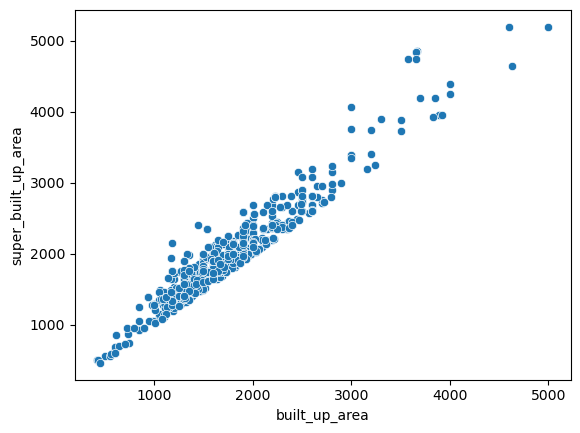

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

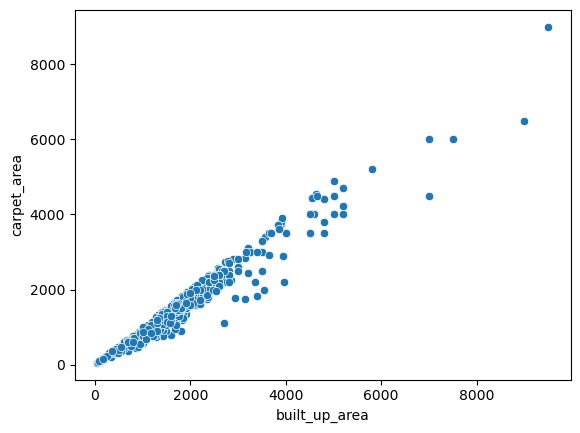

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [9]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3544    False
3545    False
3546    False
3547    False
3548    False
Length: 3549, dtype: bool

In [10]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [15]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
25,flat,ss the leaf,sector 85,1.30,10484.0,1240.0,Super Built up area 1772(164.62 sq.m.)Carpet a...,2,2,3+,10.0,East,Relatively New,1772.0,NaN,1240.00,0,0,1,0,0,0,148,620.000000
28,flat,shree vardhman victoria,sector 70,1.67,14384.0,1161.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,5,3,5.0,North-East,Moderately Old,1950.0,NaN,1161.00,0,1,0,0,0,0,108,387.000000
31,flat,corona optus,sector 37c,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.00,1,0,0,0,0,0,49,580.666667
43,flat,umang monsoon breeze,sector 78,1.20,6494.0,1848.0,Super Built up area 2250(209.03 sq.m.)Carpet a...,3,3,2,8.0,NaN,Moderately Old,2250.0,NaN,1848.00,0,0,0,1,0,2,8,616.000000
55,flat,emaar mgf palm hills,sector 77,1.90,9500.0,2000.0,Super Built up area 2000(185.81 sq.m.)Carpet a...,3,4,3+,6.0,South-West,New Property,2000.0,NaN,1218.03,0,1,0,0,0,1,42,666.666667


In [17]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [18]:
df.update(sbc_df)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\3129191992.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sbc_df)
C:\Users\vivek matele\

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1674
built_up_area          1546
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,godrej,sector 79,2.01,8495.0,2366.0,Super Built up area 2366(219.81 sq.m.),3,4,3+,6.0,East,Relatively New,2366.0,NaN,NaN,0,1,0,0,0,0,158,788.666667
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4337.0,Super Built up area 4337(402.92 sq.m.),4,5,3+,7.0,East,Relatively New,4337.0,NaN,NaN,1,1,1,0,0,1,158,1084.250000
3,flat,godrej aria,sector 79,1.10,7774.0,1415.0,Super Built up area 1351(125.51 sq.m.),2,2,3+,4.0,North-East,New Property,1351.0,NaN,NaN,0,0,0,0,0,1,49,707.500000
5,flat,bestech park view grand spa,sector 81,4.70,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140,1731.500000
7,flat,central park flower valley,sector 33,1.79,11251.0,1591.0,Super Built up area 1789(166.2 sq.m.),3,3,3,3.0,South,Old Property,1789.0,NaN,NaN,0,0,0,0,0,0,71,530.333333


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'

In [23]:
df.update(sb_df)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\273999481.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(sb_df)
C:\Users\vivek matele\AppD

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1674
built_up_area           671
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,gls avenue 51,sector 92,0.45,6000.0,750.0,Carpet area: 750 (69.68 sq.m.),3,3,1,10.0,North-East,Relatively New,NaN,NaN,750.000000,0,0,0,0,0,0,0,250.0
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.000000,0,0,0,0,0,0,101,754.0
6,house,independent,sector 2,0.40,7619.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,1,1.0,NaN,Relatively New,NaN,NaN,525.000000,0,0,0,0,0,0,0,262.5
8,flat,smart world one,dwarka expressway,1.65,5933.0,2781.0,Carpet area: 2785 (258.73 sq.m.),3,4,3,6.0,NaN,Under Construction,NaN,NaN,2785.000000,0,0,0,0,0,0,0,927.0
14,flat,breez global hill view,sohna road,0.35,6318.0,554.0,Carpet area: 554.16 (51.48 sq.m.),2,2,2,14.0,West,New Property,NaN,NaN,554.125572,0,0,0,0,0,0,53,277.0


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(roun

In [28]:
df.update(c_df)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\108363553.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(c_df)
C:\Users\vivek matele\AppDat

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 16
facing                 1008
agePossession             0
super_built_up_area    1674
built_up_area             0
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

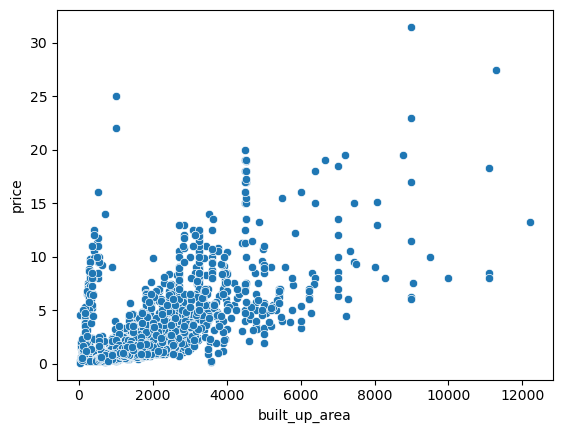

In [30]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [31]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [32]:
anamoly_df.sample(5)

,price,area,built_up_area
2558,6.25,1800.0,1800.0
652,2.90,2003.0,1813.0
330,6.50,3240.0,360.0
2673,4.45,1350.0,1350.0
1909,2.75,1640.0,1484.0


In [33]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [34]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

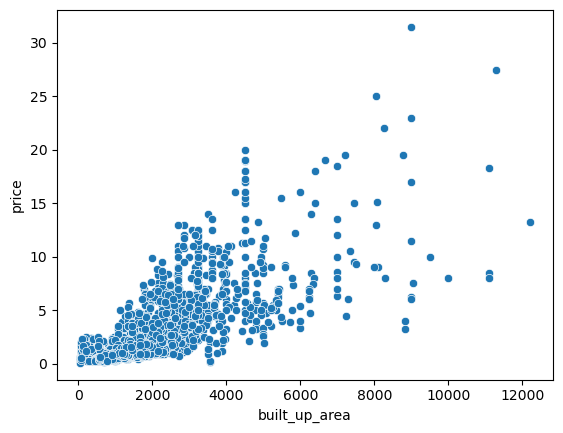

In [36]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [37]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [38]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,gls avenue 51,sector 92,0.45,6000.0,3,3,1,10.0,North-East,Relatively New,833.0,0,0,0,0,0,0,0
1,flat,godrej,sector 79,2.01,8495.0,3,4,3+,6.0,East,Relatively New,2141.0,0,1,0,0,0,0,158
2,flat,pioneer urban presidia,sector 62,7.15,16486.0,4,5,3+,7.0,East,Relatively New,3925.0,1,1,1,0,0,1,158
3,flat,godrej aria,sector 79,1.10,7774.0,2,2,3+,4.0,North-East,New Property,1223.0,0,0,0,0,0,1,49
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,NaN,Under Construction,1676.0,0,0,0,0,0,0,101


In [39]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             16
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [40]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
429,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1005,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1061,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1134,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1550,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1565,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1580,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
1869,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
1900,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1956,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9


In [41]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [42]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\vivek matele\AppData\Local\Temp\ipykernel_6988\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [43]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [44]:
1011/df.shape[0]

0.2848689771766695

### facing

<Axes: ylabel='count'>

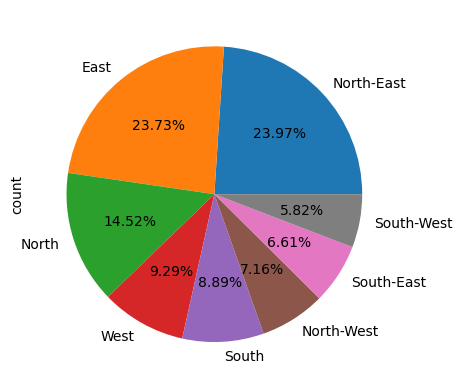

In [45]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [46]:
df.drop(columns=['facing'],inplace=True)

In [47]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
973,flat,tulip violet,sector 69,2.00,9950.0,4,4,2,0.0,Relatively New,1819.0,0,0,0,0,0,0,95
1698,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10535.0,2,2,3,10.0,Relatively New,1100.0,0,0,0,0,0,0,49
3058,flat,dlf regal gardens,sector 90,1.21,6926.0,3,3,3+,29.0,Relatively New,1581.0,0,0,0,0,1,0,95
2614,flat,ild grand,sector 37c,1.35,7143.0,3,3,0,1.0,New Property,1820.0,0,0,0,0,0,0,60
841,house,independent,sector 3 phase 3 extension,0.75,6410.0,2,2,0,1.0,Undefined,130.0,0,0,0,0,0,0,0


In [48]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [50]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1005,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [51]:
df.drop(index=[1005],inplace=True)

In [52]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [53]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         543
Old Property           292
Undefined              289
Under Construction     262
Name: count, dtype: int64

In [54]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
13,flat,trisara our homes 3,sohna road,0.38,6312.0,2,2,2,1.0,Undefined,602.0,0,0,0,0,0,0,0
16,flat,signature global orchard avenue,sector 93,0.85,14238.0,2,2,0,10.0,Undefined,597.0,0,0,0,0,0,0,0
21,flat,central park flower valley,sector 33,2.50,13270.0,3,3,2,1.0,Undefined,2093.0,0,0,0,0,0,0,66
22,flat,aardhya homesh,sector 67a,1.85,8043.0,4,4,0,4.0,Undefined,2556.0,0,0,0,0,0,0,0
39,house,independent,sector 2,5.00,15385.0,6,6,2,1.0,Undefined,3611.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,flat,mapsko casa bella,sector 82,1.75,6903.0,4,5,3+,1.0,Undefined,2535.0,0,0,0,0,0,0,54
3485,flat,shree vardhman flora,sector 90,0.80,5926.0,2,3,2,0.0,Undefined,1350.0,0,0,0,0,0,0,60
3494,house,independent,sector 3,0.90,8929.0,3,1,0,1.0,Undefined,1008.0,0,0,0,0,0,0,0
3514,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Undefined,1570.0,0,0,0,0,0,0,0


In [55]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           596
Moderately Old         582
Old Property           324
Under Construction     276
Undefined               53
Name: count, dtype: int64

In [58]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           597
Moderately Old         588
Old Property           334
Under Construction     278
Undefined               25
Name: count, dtype: int64

In [61]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [62]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [63]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         611
New Property           597
Old Property           334
Under Construction     278
Name: count, dtype: int64

In [64]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [65]:
df.to_csv('gurgaon_properties_missing_value_imputation_1.csv',index=False)

In [66]:
df.shape

(3548, 18)